# Этап 1. 
### Загрузка и проверка данных

In [1]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# загрузка DataFrame'а
df = pd.read_csv(r"C:\Users\Max\Desktop\Project\RESO.csv", encoding='utf-8')
df

,POLICY_ID,POLICY_BEGIN_MONTH,POLICY_END_MONTH,POLICY_MIN_AGE,POLICY_MIN_DRIVING_EXPERIENCE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_ENGINE_POWER,VEHICLE_IN_CREDIT,VEHICLE_SUM_INSURED,...,INSURER_GENDER,POLICY_CLM_N,POLICY_CLM_GLT_N,CLIENT_HAS_DAGO,CLIENT_HAS_OSAGO,POLICY_HAS_COMPLAINTS,POLICY_YEARS_RENEWED_N,POLICY_DEDUCT_VALUE,CLIENT_REGISTRATION_REGION,POLICY_PRICE_CHANGE
0,82937,8,8,41,5,Ford,Kuga,150.0,0,1000000.0,...,F,0,0,0,1,1,0,20000.0,Оренбургская область,-0.04
1,60630,8,8,32,1994,Hyundai,i40,178.0,0,1315000.0,...,M,1,1,0,0,0,0,15000.0,Оренбургская область,0.00
2,15621,9,9,30,7,Kia,Sportage,150.0,1,819598.0,...,M,0,0,1,0,0,2,0.0,Оренбургская область,-1.00
3,5466,2,2,44,13,Ford,Mondeo,146.0,0,686111.0,...,M,0,0,0,1,0,2,20000.0,Оренбургская область,-0.08
4,90392,8,8,41,0,Kia,Sorento,175.0,0,1829900.0,...,M,2,2,0,0,0,0,0.0,Оренбургская область,0.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9655,75528,2,2,63,40,Toyota,Land Cruiser Prado,173.0,0,2909000.0,...,M,1,1,0,1,0,0,30000.0,Оренбургская область,-0.36
9656,32650,3,3,39,14,Skoda,Octavia,102.0,1,650000.0,...,F,0,0,1,1,0,0,0.0,Оренбургская область,-0.46
9657,36923,6,6,43,15,Skoda,Octavia,180.0,0,1050000.0,...,M,0,0,1,1,0,1,10000.0,Оренбургская область,0.05
9658,58034,8,8,44,17,Ford,Explorer,294.0,1,1793985.0,...,M,1,1,0,0,0,0,0.0,Оренбургская область,0.00


In [3]:
# оценка типов данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9660 entries, 0 to 9659
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   POLICY_ID                      9660 non-null   int64  
 1   POLICY_BEGIN_MONTH             9660 non-null   int64  
 2   POLICY_END_MONTH               9660 non-null   int64  
 3   POLICY_MIN_AGE                 9660 non-null   int64  
 4   POLICY_MIN_DRIVING_EXPERIENCE  9660 non-null   int64  
 5   VEHICLE_MAKE                   9660 non-null   object 
 6   VEHICLE_MODEL                  9660 non-null   object 
 7   VEHICLE_ENGINE_POWER           9660 non-null   float64
 8   VEHICLE_IN_CREDIT              9660 non-null   int64  
 9   VEHICLE_SUM_INSURED            9660 non-null   float64
 10  POLICY_INTERMEDIARY            9660 non-null   object 
 11  INSURER_GENDER                 9660 non-null   object 
 12  POLICY_CLM_N                   9660 non-null   i

In [4]:
# Проверка на пропуски
df.isnull().sum()

POLICY_ID                        0
POLICY_BEGIN_MONTH               0
POLICY_END_MONTH                 0
POLICY_MIN_AGE                   0
POLICY_MIN_DRIVING_EXPERIENCE    0
VEHICLE_MAKE                     0
VEHICLE_MODEL                    0
VEHICLE_ENGINE_POWER             0
VEHICLE_IN_CREDIT                0
VEHICLE_SUM_INSURED              0
POLICY_INTERMEDIARY              0
INSURER_GENDER                   0
POLICY_CLM_N                     0
POLICY_CLM_GLT_N                 0
CLIENT_HAS_DAGO                  0
CLIENT_HAS_OSAGO                 0
POLICY_HAS_COMPLAINTS            0
POLICY_YEARS_RENEWED_N           0
POLICY_DEDUCT_VALUE              0
CLIENT_REGISTRATION_REGION       0
POLICY_PRICE_CHANGE              0
dtype: int64

In [5]:
# Проверка на дубликаты
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9655    False
9656    False
9657    False
9658    False
9659    False
Length: 9660, dtype: bool

# Этап 2. 
### Рассчет показателей и статистик

In [6]:
# количество женщин поступаюищх на страхование
df.groupby('INSURER_GENDER',as_index=False).agg(cnt_by_sex = ('INSURER_GENDER', 'count'))

,INSURER_GENDER,cnt_by_sex
0,F,3548
1,M,6112


In [7]:
# Соотношений мужчин к женщинам
gender_counts = df['INSURER_GENDER'].value_counts()
cnt_female = gender_counts.get('F')
cnt_male = gender_counts.get('M')

male_female_ratio = round(cnt_male/cnt_female,2)
male_female_ratio 

print(f'Всего застраховано женщин {cnt_female}, а мужчин {cnt_male}. Таким образом на кажого страхователя женского пола приходится {male_female_ratio} страхователей мужского пола')

Всего застраховано женщин 3548, а мужчин 6112. Таким образом на кажого страхователя женского пола приходится 1.72 страхователей мужского пола


In [8]:
# Соотношение количества аварий между мужчинами и женщинами
table = df.groupby('INSURER_GENDER',as_index=False).agg(cnt_clm =('POLICY_CLM_N', 'sum'))
female_clm = table.iloc[0,1]
male_clm = table.iloc[1,1]
male_female_clm_ratio = round(male_clm / female_clm,2)
print(f' На каждый страховой случай где страхователем была женщина приходится {male_female_clm_ratio} аналогичных случаев где страхователем был мужчина')

 На каждый страховой случай где страхователем была женщина приходится 1.54 аналогичных случаев где страхователем был мужчина


In [9]:
# медиана в данном случае равна нулю у обоих полов, половина или более мужчин и женщин не попадает в аварии.
female_df = df[df['INSURER_GENDER']=='F']
median_f = female_df["POLICY_CLM_N"].median()
male_df = df[df['INSURER_GENDER']=='M']
median_m =  male_df["POLICY_CLM_N"].median()
print(f'Медианное количество аварий у женщин равно {median_f}, у мужчин тоже равно {median_m}. Можно сделать вывод о том, что половина женщин и мужчин не попадают в аварии')

Медианное количество аварий у женщин равно 0.0, у мужчин тоже равно 0.0. Можно сделать вывод о том, что половина женщин и мужчин не попадают в аварии


In [10]:
# Количество случаев в которых страхователь виновник 
culprit = df.groupby(['INSURER_GENDER'])['POLICY_CLM_GLT_N'].sum().reset_index()
culprit

,INSURER_GENDER,POLICY_CLM_GLT_N
0,F,1334
1,M,2036


In [11]:
#среднее количество аварий у мужчин и женщин
female_crash = round(female_clm/cnt_female,2)*100
male_crash = round(male_clm/cnt_male,2)*100
print(f'Среди всех женщин лишь {female_crash}% обращаются за страховыми выплатами, среди мужчин данный показатель равен {male_crash}%')
total_crash = df['POLICY_CLM_N'].sum()
female_avg_crash = round(female_clm/total_crash,2)*100
male_avg_crash = round(male_clm/total_crash,2)*100
print(f'Доля женщин в выплатах составляет {female_avg_crash}% , доля мужчин же ровна {male_avg_crash}%')

Среди всех женщин лишь 45.0% обращаются за страховыми выплатами, среди мужчин данный показатель равен 40.0%
Доля женщин в выплатах составляет 39.0% , доля мужчин же ровна 61.0%


In [12]:
df["POLICY_CLM_N"].value_counts()

POLICY_CLM_N
0    6818
1    1996
2     581
3     183
4      72
5      10
Name: count, dtype: int64

In [13]:
df.shape

(9660, 21)

In [14]:
# Количество аварий по одному полису, в мужских и женских группах
group_on_gender_CLM = df.groupby(['POLICY_CLM_N', 'INSURER_GENDER']).agg(cnt_on_female = ('POLICY_CLM_N', 'count'))
group_on_gender_CLM_unstacked = group_on_gender_CLM.unstack(fill_value=0)
group_on_gender_CLM_unstacked.columns = ['Количество у мужчин', 'Количество у женщин']
group_on_gender_CLM_unstacked = group_on_gender_CLM_unstacked.fillna('n/a')
group_on_gender_CLM_unstacked = group_on_gender_CLM_unstacked.reset_index()
group_on_gender_CLM_unstacked

,POLICY_CLM_N,Количество у мужчин,Количество у женщин
0,0,2469,4349
1,1,731,1265
2,2,230,351
3,3,76,107
4,4,38,34
5,5,4,6


# Этап 3.
### Рассчет показателей и статистик для нормированной выборки

In [15]:
# Ввиду того что количество женщин и мужчин сильно олтличается, нормируем выборки, 
# выровняем количество мужчин и женщин сохрани долю аварийности.
males_df = df[df['INSURER_GENDER'] == 'M']
females_df = df[df['INSURER_GENDER'] == 'F']
size = min(len(males_df), len(females_df))

# Случайная выборка
sampled_males = males_df.sample(size, random_state=1)
sampled_females = females_df.sample(size, random_state=1)
balanced_df = pd.concat([sampled_males, sampled_females])
balanced_df.shape

(7096, 21)

In [16]:
# Соотношений мужчин к женщинам
balanced_gender_counts = balanced_df['INSURER_GENDER'].value_counts()
balanced_cnt_female = balanced_gender_counts.get('F')
balanced_cnt_male = balanced_gender_counts.get('M')

balanced_male_female_ratio = round(balanced_cnt_male/balanced_cnt_female,2)
balanced_male_female_ratio 

print(f'Всего застраховано женщин {balanced_cnt_female}, а мужчин {balanced_cnt_male}. Таким образом на кажого страхователя женского пола приходится {balanced_male_female_ratio} страхователей мужского пола')

Всего застраховано женщин 3548, а мужчин 3548. Таким образом на кажого страхователя женского пола приходится 1.0 страхователей мужского пола


In [17]:
# Соотношение количества аварий между мужчинами и женщинами
table = balanced_df.groupby('INSURER_GENDER',as_index=False).agg(cnt_clm =('POLICY_CLM_N', 'sum'))
balanced_female_clm = table.iloc[0,1]
balanced_male_clm = table.iloc[1,1]
balandec_male_female_clm_ratio = round(balanced_male_clm / balanced_female_clm,2)
print(f' На каждый страховой случай где страхователем была женщина приходится {balandec_male_female_clm_ratio} аналогичных случаев где страхователем был мужчина')

 На каждый страховой случай где страхователем была женщина приходится 0.91 аналогичных случаев где страхователем был мужчина


In [18]:
# Количество обращений мужчин и женщин в нормированной выборке
claim_counts = balanced_df.groupby(['INSURER_GENDER'])['POLICY_CLM_N'].sum().reset_index()
claim_counts

,INSURER_GENDER,POLICY_CLM_N
0,F,1591
1,M,1444


In [19]:
# Количество случаев в которых страхователь виновник 
culprit_balanced = balanced_df.groupby(['INSURER_GENDER'])['POLICY_CLM_GLT_N'].sum().reset_index()
culprit_balanced

,INSURER_GENDER,POLICY_CLM_GLT_N
0,F,1334
1,M,1198


In [20]:
group_claim_counts = balanced_df.groupby(['POLICY_CLM_N', 'INSURER_GENDER']).agg(cnt_on_female = ('POLICY_CLM_N', 'count'))
group_claim_counts_unstacked = group_claim_counts.unstack(fill_value=0)
# Переименуем уровни столбцов для удобства чтения
group_claim_counts_unstacked.columns = ['Количество у мужчин', 'Количество у женщин']

# Сбросим индекс для получения более удобного формата DataFrame
group_claim_counts_unstacked = group_claim_counts_unstacked.reset_index()
group_claim_counts_unstacked

,POLICY_CLM_N,Количество у мужчин,Количество у женщин
0,0,2469,2500
1,1,731,769
2,2,230,192
3,3,76,62
4,4,38,20
5,5,4,5


In [21]:
#среднее количество аварий у мужчин и женщин
balanced_female_crash = round(balanced_female_clm/balanced_cnt_female,2)*100
balanced_male_crash = round(balanced_male_clm/balanced_cnt_male,2)*100
print(f'Среди всех женщин лишь {balanced_female_crash}% обращаются за страховыми выплатами, среди мужчин данный показатель равен {balanced_male_crash}%')
balanced_total_crash = balanced_df['POLICY_CLM_N'].sum()
balanced_female_avg_crash = round(balanced_female_clm/balanced_total_crash,2)*100
balanced_male_avg_crash = round(balanced_male_clm/balanced_total_crash,2)*100
print(f'Доля женщин в выплатах составляет {balanced_female_avg_crash}% , доля мужчин же ровна {balanced_male_avg_crash}%')

Среди всех женщин лишь 45.0% обращаются за страховыми выплатами, среди мужчин данный показатель равен 41.0%
Доля женщин в выплатах составляет 52.0% , доля мужчин же ровна 48.0%


#  Этап 4.
### Построение визуализаций и корреляционный анализ

Среднее количество убытков по полу:
  INSURER_GENDER  POLICY_CLM_N
0              F      0.448422
1              M      0.401505


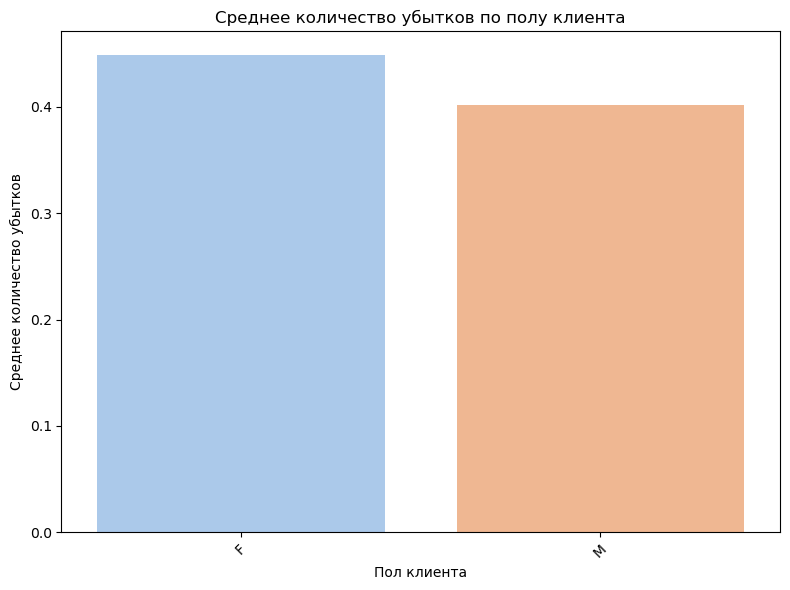

In [22]:
average_claims = df.groupby('INSURER_GENDER')['POLICY_CLM_N'].mean().reset_index()

# Выводим результаты
print("Среднее количество убытков по полу:")
print(average_claims)

# Построение графика для наглядности
plt.figure(figsize=(8, 6))
sns.barplot(x='INSURER_GENDER', y='POLICY_CLM_N', data=average_claims, palette='pastel')
plt.title('Среднее количество убытков по полу клиента')
plt.xlabel('Пол клиента')
plt.ylabel('Среднее количество убытков')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
df['INSURER_GENDER'] = df['INSURER_GENDER'].map({'F': 0, 'M': 1})
balanced_df['INSURER_GENDER'] = balanced_df['INSURER_GENDER'].map({'F': 0, 'M': 1})

Корреляционная матрица между INSURER_GENDER и POLICY_CLM_N:
                INSURER_GENDER  POLICY_CLM_N
INSURER_GENDER        1.000000     -0.029507
POLICY_CLM_N         -0.029507      1.000000


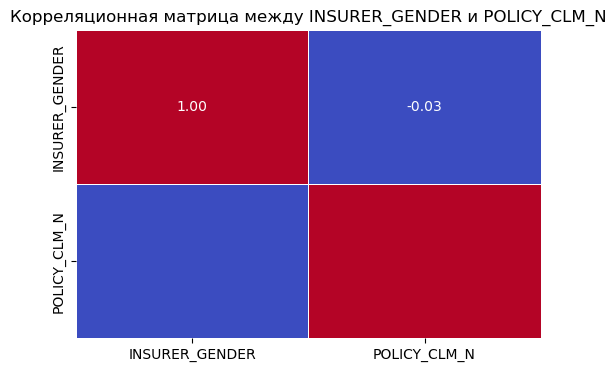

Коэффициент корреляции между полом клиента и количеством убытков: -0.03


In [24]:
subset_df = df[['INSURER_GENDER', 'POLICY_CLM_N']]

# Вычисление корреляционной матрицы для двух столбцов
correlation_matrix = subset_df.corr()

# Вывод корреляционной матрицы
print("Корреляционная матрица между INSURER_GENDER и POLICY_CLM_N:")
print(correlation_matrix)

# Визуализация корреляционной матрицы
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=False)
plt.title('Корреляционная матрица между INSURER_GENDER и POLICY_CLM_N')
plt.show()

# Выделение коэффициента корреляции между полом и количеством убытков
correlation_value = correlation_matrix.loc['INSURER_GENDER', 'POLICY_CLM_N']
print(f"Коэффициент корреляции между полом клиента и количеством убытков: {correlation_value:.2f}")

In [25]:
correl = subset_df['INSURER_GENDER'].corr(subset_df['POLICY_CLM_N'])
correl

-0.029507252795821167

In [26]:
subset_df.head()

,INSURER_GENDER,POLICY_CLM_N
0,0,0
1,1,1
2,1,0
3,1,0
4,1,2


Корреляционная матрица между INSURER_GENDER и POLICY_CLM_N:
                INSURER_GENDER  POLICY_CLM_N
INSURER_GENDER        1.000000     -0.026659
POLICY_CLM_N         -0.026659      1.000000


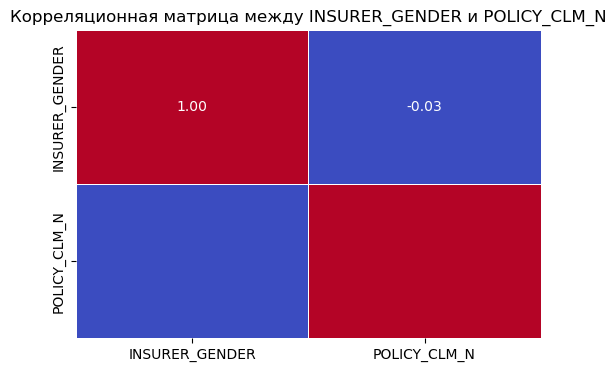

Коэффициент корреляции между полом клиента и количеством убытков: -0.03


In [27]:
halfsubset = balanced_df[['INSURER_GENDER', 'POLICY_CLM_N']]

# Вычисление корреляционной матрицы для двух столбцов
correlation_matrix = halfsubset.corr()

# Вывод корреляционной матрицы
print("Корреляционная матрица между INSURER_GENDER и POLICY_CLM_N:")
print(correlation_matrix)

# Визуализация корреляционной матрицы
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=False)
plt.title('Корреляционная матрица между INSURER_GENDER и POLICY_CLM_N')
plt.show()

# Выделение коэффициента корреляции между полом и количеством убытков
correlation_value = correlation_matrix.loc['INSURER_GENDER', 'POLICY_CLM_N']
print(f"Коэффициент корреляции между полом клиента и количеством убытков: {correlation_value:.2f}")

In [28]:
correlation = halfsubset['INSURER_GENDER'].corr(halfsubset['POLICY_CLM_N'])
correlation

-0.026658734200088324

## Выводы
   ### Частота ДТП:
##### Несмотря на то, что на каждого застрахованного женского пола приходится почти 1.72 застрахованных мужского, в общей выборке женщины имеют меньшую частоту обращений за страховыми выплатами, а мужчины имеют больше случаев ДТП. Однако в нормированной выборке количество ДТП между полами выравнивается, и соотношение даже меняется в сторону женщин.
   ### Виновность:
##### Мужчины чаще являются виновниками ДТП, что проявляется в перевесе их случаев (2036 против 1334 у женщин) в общей выборке. Однако в нормированной выборке разница в виновности становится меньше (1198 случаев у мужчин против 1334 у женщин).
   ### Обращение за выплатами:
##### Женщины больше склонны к обращению за страховыми выплатами, что может свидетельствовать о большей активности в данной области по сравнению с мужчинами. В нормированной выборке этот показатель даже меняется в пользу женщин (52% против 48%).
   ### Связь между полом и ДТП:
##### Негативный коэффициент корреляции (-0.03) указывает на отсутствие значительной связи между полом клиента и количеством ДТП. Это может означать, что пол не является определяющим фактором в количестве аварий.
   ### Заключение:
##### Сравнивая данные из общей и нормированной выборок, можно отметить, что общее количество аварий среди мужчин выше, но в нормированной выборке женщины показывают большую активность по обращению за выплатами и по количеству виновных случаев. Таким образом, можно сказать, что статистически мужчины чаще попадают в ДТП, однако, среди застрахованных женщин наблюдается более высокая частота обращений за выплатами и уровне убытков в случае их участия в авариях. Это может указывать на различия в поведении на дороге и подход к страхованию между мужчинами и женщинами.